In [ ]:
By : SVM , RandomForest , K-Nearest Neighors[KNN] , 

In [ ]:
# Support Vector Machines have two(2) class
# If there is any point between two class make the half of it and see what class is near [meargen ]
# Kernel ---> fillter
# Not balanced It have to me balance 
# Accuaerce --> 0.99
# Image --> 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
import seaborn as sns
from sklearn import svm,ensemble,neighbors,linear_model

In [2]:
# Load digits dataset :
digits = datasets.load_digits()
x = digits.data
y = digits.target

# EDA

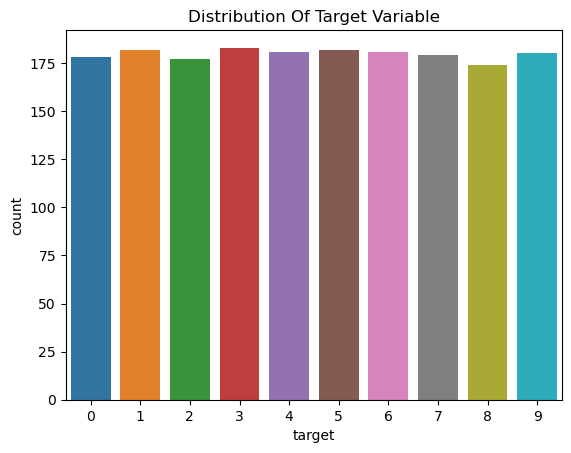

In [4]:
# Convert Target to datFrame for Seaborn :
df_y = pd.DataFrame(y,columns=["target"])

sns.countplot(x="target" , data=df_y)
plt.title("Distribution Of Target Variable")
plt.show()

In [5]:
# Split the data into Training and Testing sets :
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
# Define the model :
models = {
    "SVM": svm.SVC(kernel='linear', C=1 , random_state=42),
    "Random Forest": ensemble.RandomForestClassifier(random_state=41),
    "KNN": neighbors.KNeighborsClassifier(),
    "Logistic Regression": linear_model.LogisticRegression(max_iter=10000,random_state=42)
}

In [7]:
models

{'SVM': SVC(C=1, kernel='linear', random_state=42),
 'Random Forest': RandomForestClassifier(random_state=41),
 'KNN': KNeighborsClassifier(),
 'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42)}

In [10]:
# Train the model and calculate the score :
scores_train_val = {}
scores_cv = {}

for model_name in models:
    model = models[model_name]
    model.fit(x_train , y_train)
    scores_train_val[model_name] = model.score(x_test,y_test)
    scores_cv[model_name] = cross_val_score(model , x , y , cv=10).mean()

In [11]:
# Print it :
print(f' Cross-Valiation score : {scores_train_val}')
print(f' Cross-Valiation score : {scores_cv}')

 Cross-Valiation score : {'SVM': 0.9777777777777777, 'Random Forest': 0.9666666666666667, 'KNN': 0.9861111111111112, 'Logistic Regression': 0.9722222222222222}
 Cross-Valiation score : {'SVM': 0.9604872749844816, 'Random Forest': 0.9476722532588454, 'KNN': 0.9716294227188081, 'Logistic Regression': 0.9276443202979516}


In [15]:
# Convert scores to dataFrame for seaborn :
df_scores_train_val = pd.DataFrame(scores_train_val.items(), columns=['Model' , 'Score'])
df_scores_train_val['Method'] = "Train / Valiation"

df_scores_cv = pd.DataFrame(scores_train_val.items(),columns=['Model','Score'])
df_scores_cv['Method'] = 'Cross-Validation'

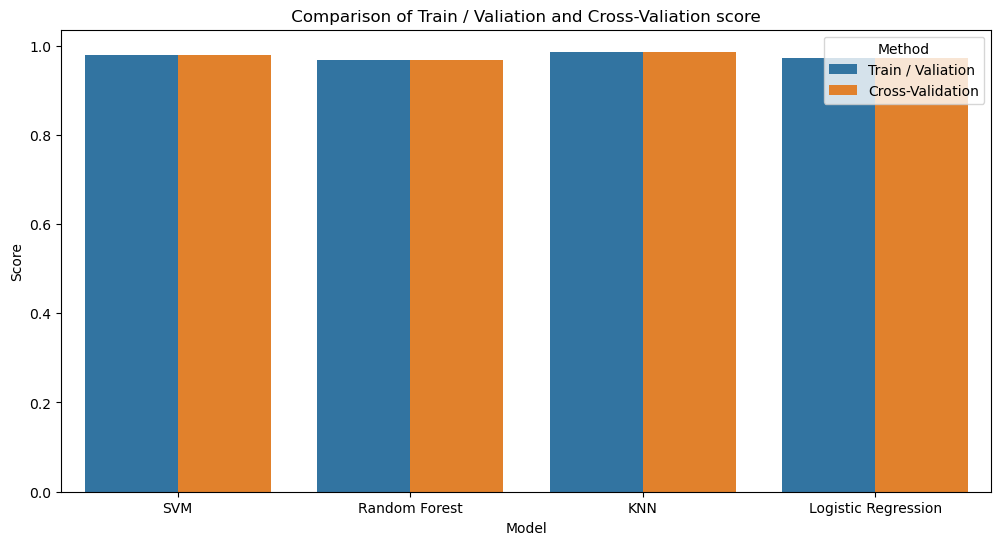

In [16]:
# Concatenate datframe and plot 
df_scores = pd.concat([df_scores_train_val , df_scores_cv])
plt.figure(figsize=(12,6))
sns.barplot(x="Model" , y ="Score" , hue = "Method" , data= df_scores)
plt.title(" Comparison of Train / Valiation and Cross-Valiation score ")
plt.show()